# Comparison of PCA methods

## Load MNIST Dataset

In [1]:
from sklearn import datasets
mnist = datasets.fetch_openml('mnist_784', data_home='../../data/')
mnist_data = mnist.data / 255.
mnist_0 = mnist_data[mnist.target == '0']

mnist_shape = (28, 28)
train = mnist_0[:-1]
test_0 = mnist_0[-1].reshape(1, -1)
test_1 = mnist_data[mnist.target == '1'][-1].reshape(1, -1)

print(f'Train size: {len(train)}')

Train size: 6902


## Fit PCA Models
* PCA
* Kernel PCA
* Two-dimensional PCA

In [2]:
from sklearn.decomposition import PCA, KernelPCA
import sys
sys.path += ['../..']
from modules.two_dimensional_pca import TwoDimensionalPCA

n_components = 5
%time pca = PCA(n_components=n_components).fit(train)
%time kpca = KernelPCA(n_components=n_components, fit_inverse_transform=True).fit(train)
%time tdpca = TwoDimensionalPCA(n_components=n_components).fit(train.reshape(-1, *mnist_shape))

CPU times: user 545 ms, sys: 93.9 ms, total: 639 ms
Wall time: 310 ms
CPU times: user 10.9 s, sys: 1.22 s, total: 12.1 s
Wall time: 7.8 s
CPU times: user 97.6 ms, sys: 59.3 ms, total: 157 ms
Wall time: 195 ms


## Transform -> Inverse Transform

### Decompose and reconstruct 0 image

In [3]:
%time pca_result_0 = pca.inverse_transform(pca.transform(test_0))
%time kpca_result_0 = kpca.inverse_transform(kpca.transform(test_0))
%time tdpca_result_0 = tdpca.inverse_transform(tdpca.transform(test_0.reshape(1, *mnist_shape)))

CPU times: user 1.17 ms, sys: 2.72 ms, total: 3.89 ms
Wall time: 4.26 ms
CPU times: user 14.3 ms, sys: 2.24 ms, total: 16.5 ms
Wall time: 11.5 ms
CPU times: user 90 µs, sys: 3 µs, total: 93 µs
Wall time: 103 µs


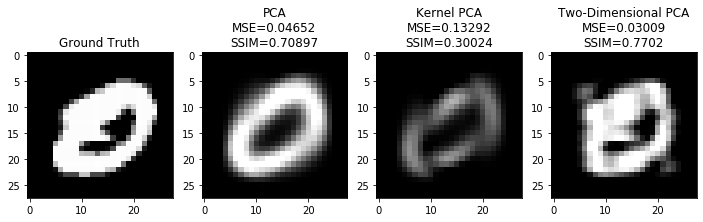

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity

norm = Normalize(vmin=0, vmax=1)

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.imshow(test_0[0].reshape(mnist_shape), cmap='gray', norm=norm)
plt.grid(False)
plt.title('Ground Truth')

plt.subplot(1, 4, 2)
plt.imshow(pca_result_0[0].reshape(mnist_shape), cmap='gray', norm=norm)
plt.grid(False)
plt.title('PCA\n'
              f'MSE={round(mean_squared_error(test_0[0], pca_result_0[0]), 5)}\n'
              f'SSIM={round(structural_similarity(test_0[0].reshape(mnist_shape), pca_result_0[0].reshape(mnist_shape)), 5)}')

plt.subplot(1, 4, 3)
plt.imshow(kpca_result_0[0].reshape(mnist_shape), cmap='gray', norm=norm)
plt.grid(False)
plt.title('Kernel PCA\n'
              f'MSE={round(mean_squared_error(test_0[0], kpca_result_0[0]), 5)}\n'
              f'SSIM={round(structural_similarity(test_0[0].reshape(mnist_shape), kpca_result_0[0].reshape(mnist_shape)), 5)}')

plt.subplot(1, 4, 4)
plt.imshow(tdpca_result_0[0].reshape(mnist_shape), cmap='gray', norm=norm)
plt.grid(False)
plt.title('Two-Dimensional PCA\n'
              f'MSE={round(mean_squared_error(test_0[0], tdpca_result_0[0].flatten()), 5)}\n'
              f'SSIM={round(structural_similarity(test_0[0].reshape(mnist_shape), tdpca_result_0[0]), 5)}')
plt.show()

### Decompose and reconstruct 1 image

In [6]:
%time pca_result_1 = pca.inverse_transform(pca.transform(test_1))
%time kpca_result_1 = kpca.inverse_transform(kpca.transform(test_1))
%time tdpca_result_1 = tdpca.inverse_transform(tdpca.transform(test_1.reshape(1, *mnist_shape)))

CPU times: user 374 µs, sys: 149 µs, total: 523 µs
Wall time: 383 µs
CPU times: user 13.5 ms, sys: 1.41 ms, total: 14.9 ms
Wall time: 11.3 ms
CPU times: user 374 µs, sys: 117 µs, total: 491 µs
Wall time: 264 µs


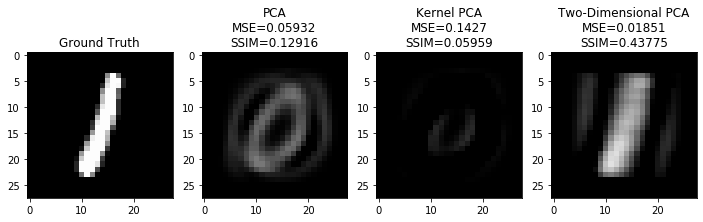

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity

norm = Normalize(vmin=0, vmax=1)

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.imshow(test_1[0].reshape(mnist_shape), cmap='gray', norm=norm)
plt.grid(False)
plt.title('Ground Truth')

plt.subplot(1, 4, 2)
plt.imshow(pca_result_1[0].reshape(mnist_shape), cmap='gray', norm=norm)
plt.grid(False)
plt.title('PCA\n'
              f'MSE={round(mean_squared_error(test_1[0], pca_result_1[0]), 5)}\n'
              f'SSIM={round(structural_similarity(test_1[0].reshape(mnist_shape), pca_result_1[0].reshape(mnist_shape)), 5)}')

plt.subplot(1, 4, 3)
plt.imshow(kpca_result_1[0].reshape(mnist_shape), cmap='gray', norm=norm)
plt.grid(False)
plt.title('Kernel PCA\n'
              f'MSE={round(mean_squared_error(test_1[0], kpca_result_1[0]), 5)}\n'
              f'SSIM={round(structural_similarity(test_1[0].reshape(mnist_shape), kpca_result_1[0].reshape(mnist_shape)), 5)}')

plt.subplot(1, 4, 4)
plt.imshow(tdpca_result_1[0].reshape(mnist_shape), cmap='gray', norm=norm)
plt.grid(False)
plt.title('Two-Dimensional PCA\n'
              f'MSE={round(mean_squared_error(test_1[0], tdpca_result_1[0].flatten()), 5)}\n'
              f'SSIM={round(structural_similarity(test_1[0].reshape(mnist_shape), tdpca_result_1[0]), 5)}')
plt.show()